# Ejemplos cortos en covarianza y autocovarianza.
$X,Y$ son series de tiempo. $X=(x_i)$, $Y=(y_i)$, $i=0,1,2, \cdots,n $.

\begin{eqnarray}
Y_0 &=& Y = (y_i) = (y_0, y_1, \cdots, y_n) \\
Y_1 &=& (y_{i+1} =  (y_1, \cdots, y_{n}, 0) \\
Y_2 &=& (y_{i+2}) = (y_2, \cdots, y_{n}, 0, 0 ) \\
&\vdots&  \\
Y_k &=& (y_{i+k}) = (y_k, y_{k+1}, \cdots, y_n, 0, \cdots, 0) \quad, k \quad \text{ceros} 
\end{eqnarray}

Ejemplo:

\begin{eqnarray*}
  Y_0 &=& Y= (3,2,5,5,6,-45) \quad, \quad \mu_0 = -4\\
  Y_1 &=&  (2,5,5,6,-45,0) \quad , \quad \mu_1 = -4.5 \\
  Y_2 &=&  (5,5,6,-45,0,0)  \quad , \quad \mu_2 = -4.83 \\
  Y_3 &=&  (5,6,-45,0,0,0)  \quad , \quad \mu_3 = 5.67 \\
  Y_4 &=&  (6,-45,0,0,0,0)  \quad , \quad \mu_4 = -6.4 \\
  Y_5 &=&  (-45,0,0,0,0,0) \quad , \quad \mu_5 = -7.5 .
\end{eqnarray*}


Ahora, $Y_6=Y_7= \cdots = 0$. 

Recerde,la covarianza con desplazamiento (shift),deun vector $Y_k$ contra
un vector  $X$

$$ \gamma_k = \gamma(X, Y_k) = \text{Cov}(X, Y_k) = \mathbb{E}[(X - \mu_X)(Y_k -  \mu_k) ]$$

Si expandieramos esta  formula, y usando un "unbiased estimator" 
$X$ es estacionaria debilmente

$$ \gamma_k = \frac{1}{m-1} \sum_{i=1}^{m-k} (x_i - \mu_x) (y_{i+k} - \mu_k) $$
ausmiendo que tenemos $m$ muestras, o $m$ es la dimension del vector $Y$.

Ejemplo numerico: Asuma una serie de tiempo $Y$ como la de arriba
y un vector $X=(1,-1,3,5,7,-9)$.

\begin{eqnarray*}
    X &=& (1,-1,3,5,7,-9) \quad , \quad  \mu_X = 1
    \quad , \; X - \mu_X =  (0,  -2,   2,   4,   6, -10) \\
    Y_0 &=& Y= (3,2,5,5,6,-45) \;, \; \mu_0 = -4 \; , \; Y_0-\mu_0 = (7, 6, 9, 9, 10, -41)\\
    Y_1 &=&  (2,5,5,6,-45,0) \; , \; \mu_1 = -4.5  \; , \; Y_1-\mu_1 = (6.5, 9.5, 9.5, 10.5,
    -40.5, 4.5) \\ 
    Y_2 &=&  (5,5,6,-45,0,0)  \; , \; \mu_2 = -4.83  \; , \; Y_2-\mu_2 =(9.83, 9.83,10.83,
    -40.17, 4.83, 4.83) \\
    Y_3 &=&  (5,6,-45,0,0,0)  \; , \; \mu_3 = -5.67  \; , \; Y_3-\mu_3 = (10.67, 11.67, -39.33,
    5.67, 5.67,5.6)
    \\
    Y_4 &=&  (6,-45,0,0,0,0)  \; , \; \mu_4 =  -6.5 \; , \; Y_4-\mu_4 = (12.5, -38.5, 6.5, 6.5,
    6.5,6.5) \\
    Y_5 &=&  (-45,0,0,0,0,0) \; , \; \mu_5 = -7.5 \; , \; Y_5-\mu_5 =  (-37.5, 7.5, 7.5, 7.5,
    7.5 , 7.5)
  \end{eqnarray*}




  We compute each 



Hagamos los calculos:

\begin{eqnarray*}
  \gamma_0 &=& \frac15 (0,  -2,   2,   4,   6, -10) \cdot (7, 6, 9, 9, 10, -41)=102.4  \\
  \gamma_1 &=& \frac15  (0,  -2,   2,   4,   6, -10)\cdot (6.5, 9.5, 9.5, 10.5, −40.5, 4.5)=
  -41.2 \\
  \gamma_2 &=& \frac15  (0,  -2,   2,   4,   6, -10)\cdot ( 9.83, 9.83, 10.83, −40.17, 4.83,
  4.83)= -32.4 \\
  \gamma_3 &=& \frac15  (0,  -2,   2,   4,   6, -10)\cdot ( 10.67, 11.67, −39.33, 5.67, 5.67,
  5.6) = -20.4 \\
  \gamma_4 &=& \frac15  (0,  -2,   2,   4,   6, -10)\cdot (12.5, − 38.5, 6.5, 6.5, 6.5, 6.5) =
  16 \\
  \gamma_5 &=& \frac15  (0,  -2,   2,   4,   6, -10) \cdot  (−37.5, 7.5, 7.5, 7.5, 7.5, 7.5 ) =
  0
\end{eqnarray*}


## Sistematizacion del proceso usando Python

In [ ]:
import numpy as np
from numpy import array, dot, mean

## implementacion del shift (a izquierda y a derecha)
def shift(arr, num, fill_value=0):
    result = np.empty_like(arr)

    if num>0:  # el corrimiento es a la derecha (es al reves arreglar luego)
        result[:num] = fill_value
        result[num:] = arr[:-num]
    elif num < 0 :  # el corrimiento es a la izquierda
        result[num:] = fill_value
        result[:num] = arr[-num:]
    else:
        result[:] = arr

    return result

In [ ]:
X=np.array([3.,-2.,5.,7.,7.,6.])

print(shift(X, 0))
print(shift(X, 1))
print(shift(X, 2))
print(shift(X,3))


[ 3. -2.  5.  7.  7.  6.]
[ 0.  3. -2.  5.  7.  7.]
[ 0.  0.  3. -2.  5.  7.]
[ 0.  0.  0.  3. -2.  5.]


In [ ]:
print(shift(X, 0))
print(shift(X, -1))
print(shift(X, -2))
print(shift(X,-3))
print(shift(X,-4))
print(shift(X,-5))
print(shift(X,-6))



[ 3. -2.  5.  7.  7.  6.]
[-2.  5.  7.  7.  6.  0.]
[5. 7. 7. 6. 0. 0.]
[7. 7. 6. 0. 0. 0.]
[7. 6. 0. 0. 0. 0.]
[6. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0.]


Salvedad: En  este programa cuando es "+" corre a la derecha y cuando es "-" corre a la izquierda. En nuestra teoria es al contrario. 


Ahora vamos a correr los datos y remover las medias

In [ ]:

Y=array([3,2,5,5,6,-45])
print(Y, "   ", mean(Y), "   ", Y-mean(Y) )
for i in range(1, len(Y)):
    U = shift(Y, -i )
    mu = round(mean(U), 2)
    Us = U-mu
    print(U, "  ", mu, "  ", Us)

[  3   2   5   5   6 -45]     -4.0     [  7.   6.   9.   9.  10. -41.]
[  2   5   5   6 -45   0]    -4.5    [  6.5   9.5   9.5  10.5 -40.5   4.5]
[  5   5   6 -45   0   0]    -4.83    [  9.83   9.83  10.83 -40.17   4.83   4.83]
[  5   6 -45   0   0   0]    -5.67    [ 10.67  11.67 -39.33   5.67   5.67   5.67]
[  6 -45   0   0   0   0]    -6.5    [ 12.5 -38.5   6.5   6.5   6.5   6.5]
[-45   0   0   0   0   0]    -7.5    [-37.5   7.5   7.5   7.5   7.5   7.5]


## Paso final, hallar los coeficientes : $\gamma_k = \mathbb{E}[(X - \mu_X)(Y- \mu_k)]$

In [ ]:
X = array([1,-1,3,5,7,-9])
X = X - mean(X)
Y = Y - mean(Y)

gamma = []
for i in range(0, len(Y)):
    U = shift(Y, -i, 0)
    mu = round(mean(U), 2)
    Us = U-mu
    gamma.append( dot(X, Us)/(len(Y)-1))

print(gamma)

[102.4, -41.199999999999996, -32.39999999999999, -20.4, 16.400000000000002, 2.842170943040401e-15]


# Hablemos de Autocovarianza. La autocovarianza esta normalizada.

$$ \rho_k = \frac{\gamma_k}{\gamma_0}  $$
$$ \rho_0 = 1$$.  La autocovarianza esta entre -1 y 1 (recuerde el coeficiente de correlacion de Pearson). $\rho_k \in [-1,1,]$, $\forall k$. 

In [ ]:
X = array([1,-1,3,5,7,-9])
Y = X # he aqui la autocovarianza

X = X - mean(X)
Y = Y - mean(Y)

gamma = []
for i in range(0, len(Y)):
    U = shift(Y, -i, 0)
    mu = round(mean(U), 2)
    Us = U-mu
    gamma.append( dot(X, Us)/(len(Y)-1))

print(gamma)

[32.0, -6.4, -7.2, -6.4, 4.0, 0.0]


La autocorrelacion es normalizada

In [ ]:
print(gamma/gamma[0])

[ 1.    -0.2   -0.225 -0.2    0.125  0.   ]


Esto fue cono las unhas. En Python hay librerias que nos ayudan con esto.
Veamos.

In [ ]:
import statsmodels.api as sm
n=6  # es el numero de elementos de salida de la autocorrelacion
rho = sm.tsa.acf(X)[0:n]

print(rho)



[ 1.    -0.2   -0.225 -0.2    0.125  0.   ]


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:657: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


### Mas formas en Python para  calcular la ACF : Autocorrelation function. O sea los $\rho_k$. 

Vamos a generar datos sinteticos. Estos se llaman **autoregression** que los vemos en la proxima clase.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed (1)  # semilla para garantizar que siempre se generan los mismos datos aleatorios
mu, sigma = 0, 1  # parametros de distribucion normal
N=1000 # numero de muestras
Z = np.random.normal(mu, sigma, N)  # genera una serie aleatoria (ruido blanco)


# phi = 0.3 lo explico en la proxima clase
phi = 0.3
X = np.zeros(N)
X[0] = Z[0]

for t in range(1,N):
    X[t] = Z[t] + phi*X[t-1]

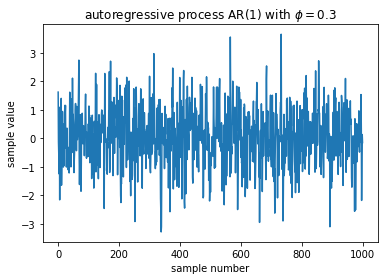

In [ ]:
plt.xlabel("sample number")
plt.ylabel("sample value")
plt.title("autoregressive process AR(1) with $\phi=0.3$")
plt.plot(X)
plt.show()

### Calculamos las ACF (Autocorrelation function) $\rho_k$ usando dos herramientas distinticas 

In [ ]:
import statsmodels.api as sm
rho = sm.tsa.acf(X)[0:10]
rho

array([ 1.        ,  0.27510897,  0.09029087, -0.00546397,  0.02752174,
       -0.01552419,  0.0022639 , -0.04671345, -0.03792018, -0.04365983])

In [ ]:
# calculemos el primero coeficiente a mano
temps = X
temps1 = temps[:-1]  # hasta la penultima muestra
tempsp1 = temps[1:] # shift + plus + 1

np.corrcoef(temps1, tempsp1)

array([[1.        , 0.27544095],
       [0.27544095, 1.        ]])

In [ ]:
np.corrcoef([temps1, tempsp1])[0,1]

0.27544094687097415

In [ ]:
# extendamos esto con programa corto
M=10
temps=X
rho2 = np.zeros(M)
rho2[0]=1  # sabemos esto
for L in range(1, M):
    tempsL= temps[:-L]  # hasta el L-esimo del final hacia adelante
    tempspL = temps[L:] # desde el L-esimo hacia adelante
    rho2[L] = np.corrcoef(tempsL, tempspL)[0,1]

rho2

array([ 1.        ,  0.27544095,  0.09040156, -0.00547259,  0.02765565,
       -0.01560294,  0.00228011, -0.0471497 , -0.03828027, -0.04407558])

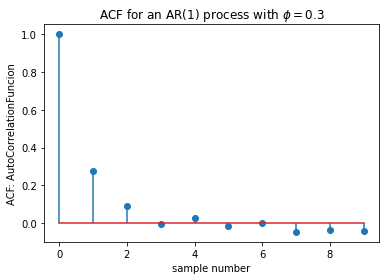

In [ ]:
# graficamos
plt.xlabel("sample number")
plt.ylabel("ACF: AutoCorrelationFuncion")
plt.title("ACF for an AR(1) process with $\phi=0.3$")
plt.stem(rho2, use_line_collection=True)
plt.show()

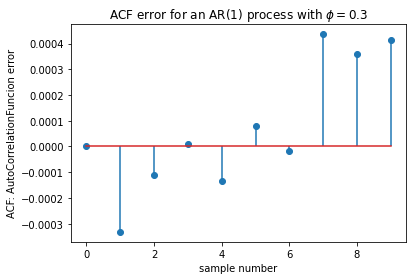

In [ ]:
# Graficquemos el error
plt.xlabel("sample number")
plt.ylabel("ACF: AutoCorrelationFuncion error")
plt.title("ACF error for an AR(1) process with $\phi=0.3$")
plt.stem(rho-rho2, use_line_collection=True)
plt.show()